In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
f = lambda x: torch.cos(x)

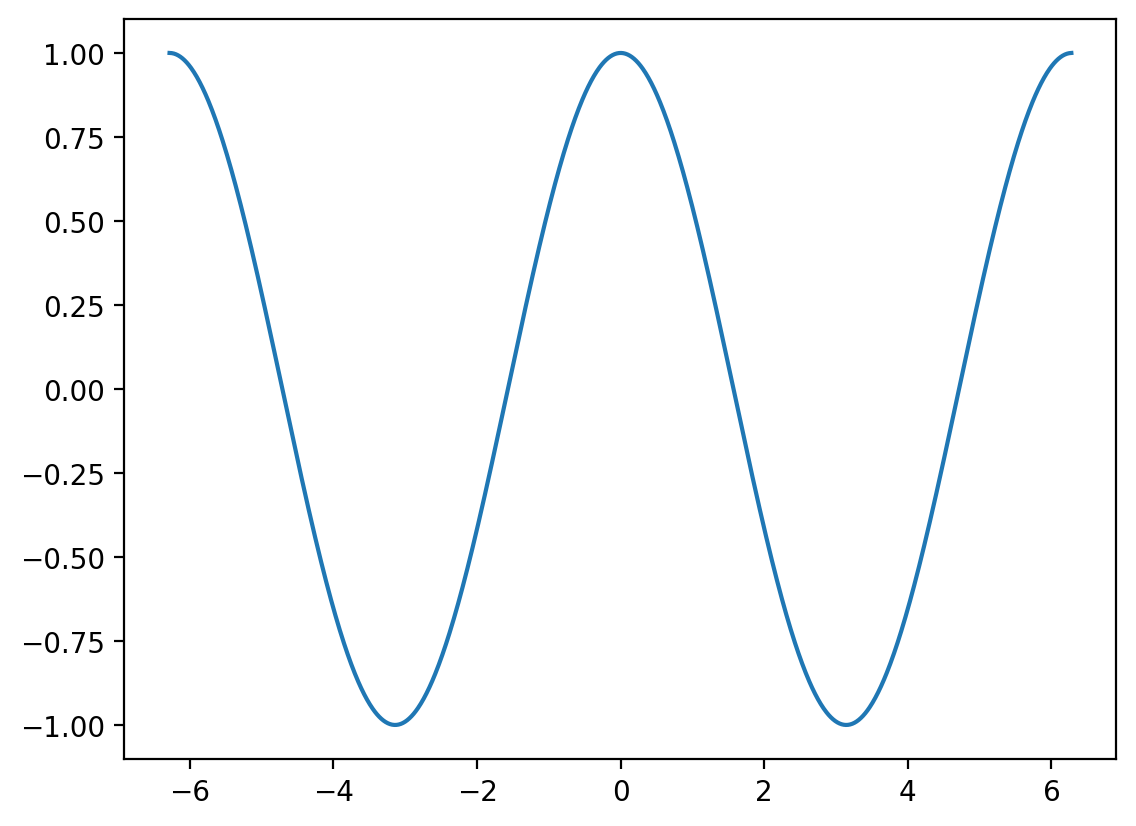

In [4]:
x_range = torch.arange(-2*np.pi, 2*np.pi, 0.01)
y_range = f(x_range)
plt.plot(x_range, y_range)

In [5]:
def nth_order_appx(f, n, x0=0.0, verbose=False):
    x0 = torch.tensor(x0)
    derivs = {1:torch.func.grad(f)}
    vals = {0:f(x0), 1:derivs[1](x0)}
    if verbose:
        print("f(x0) = {}".format(vals[0]))
        print("f'(x0) = {}".format(vals[1]))

    for i in range(2, n+1):
        derivs[i] = torch.func.grad(derivs[i-1])
        vals[i] = derivs[i](x0)
        if verbose:
            d = "'"*i
            print("f{}(x0) = {}".format(d, vals[i]))
    
    def g(x):
        x_diff = x - x0
        str_rep = "f(x) = f(x0) + "
        out = vals[0].repeat(x.shape)
        for i in range(1, n+1):
            str_rep += f"{vals[i]} * (x-{x0.item()})^{i} / {i}! + "
            out += vals[i] * x_diff**i / torch.math.factorial(i)
        if verbose:
            print("--"*40)
            print(str_rep)
        return out

    return g
        

In [6]:
f = lambda x: torch.cos(x)
_ = nth_order_appx(f, 2, 0.0, verbose=True)(x_range)

f(x0) = 1.0
f'(x0) = -0.0
f''(x0) = -1.0
--------------------------------------------------------------------------------
f(x) = f(x0) + -0.0 * (x-0.0)^1 / 1! + -1.0 * (x-0.0)^2 / 2! + 


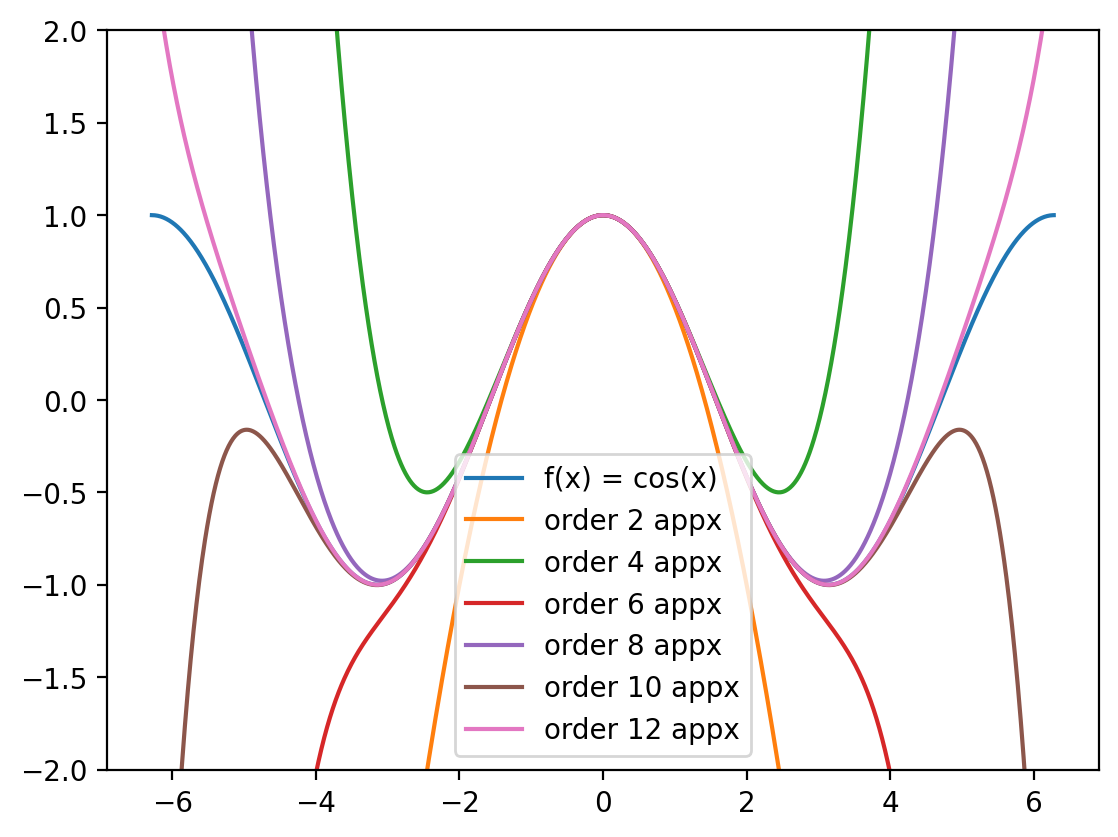

In [7]:
plt.plot(x_range, f(x_range), label="f(x) = cos(x)")
for i in range(2, 13, 2):
    plt.plot(x_range, nth_order_appx(f,  i, 0.0)(x_range), label=f"order {i} appx")
plt.ylim(-2, 2)
plt.legend()

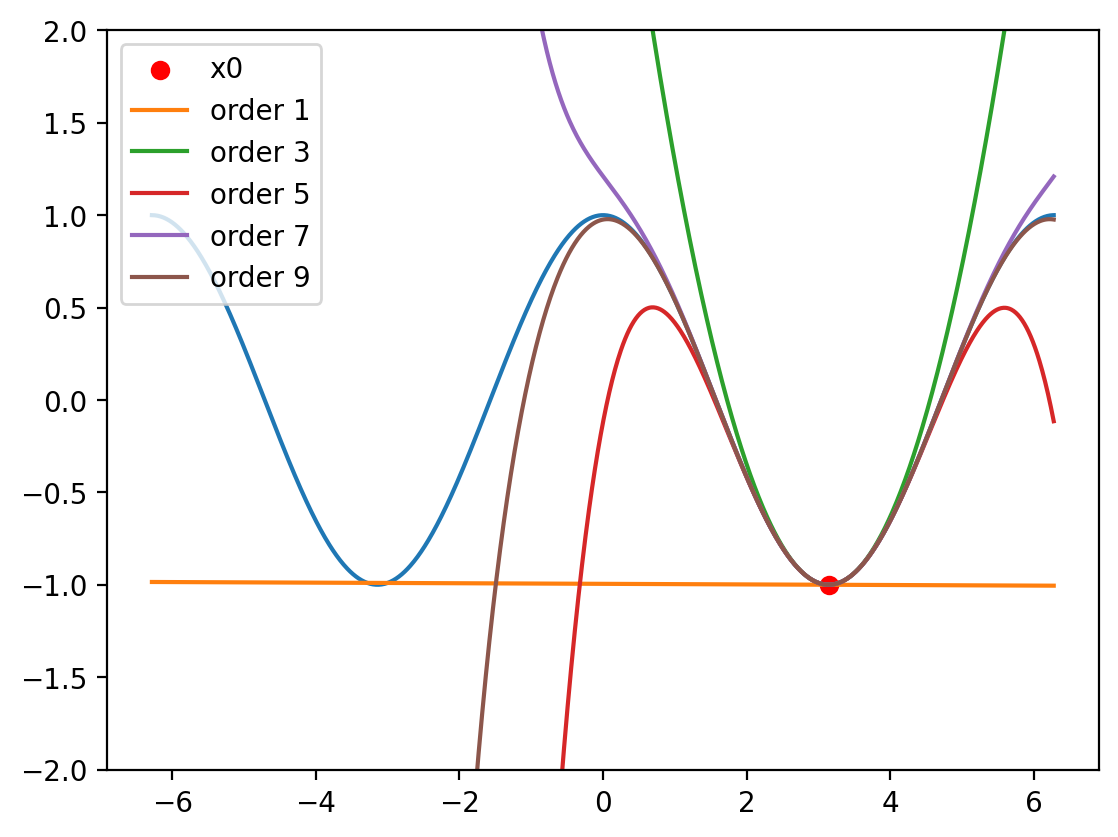

In [8]:
f = lambda x: torch.cos(x)
x0 = 3.14
plt.plot(x_range, f(x_range))
plt.scatter(x0, f(torch.tensor(x0)), c='r', label='x0')
for i in range(1, 11, 2):
    
    plt.plot(x_range, nth_order_appx(f,  i, 3.14)(x_range), label=f"order {i}")
plt.ylim(-2, 2)
plt.legend()

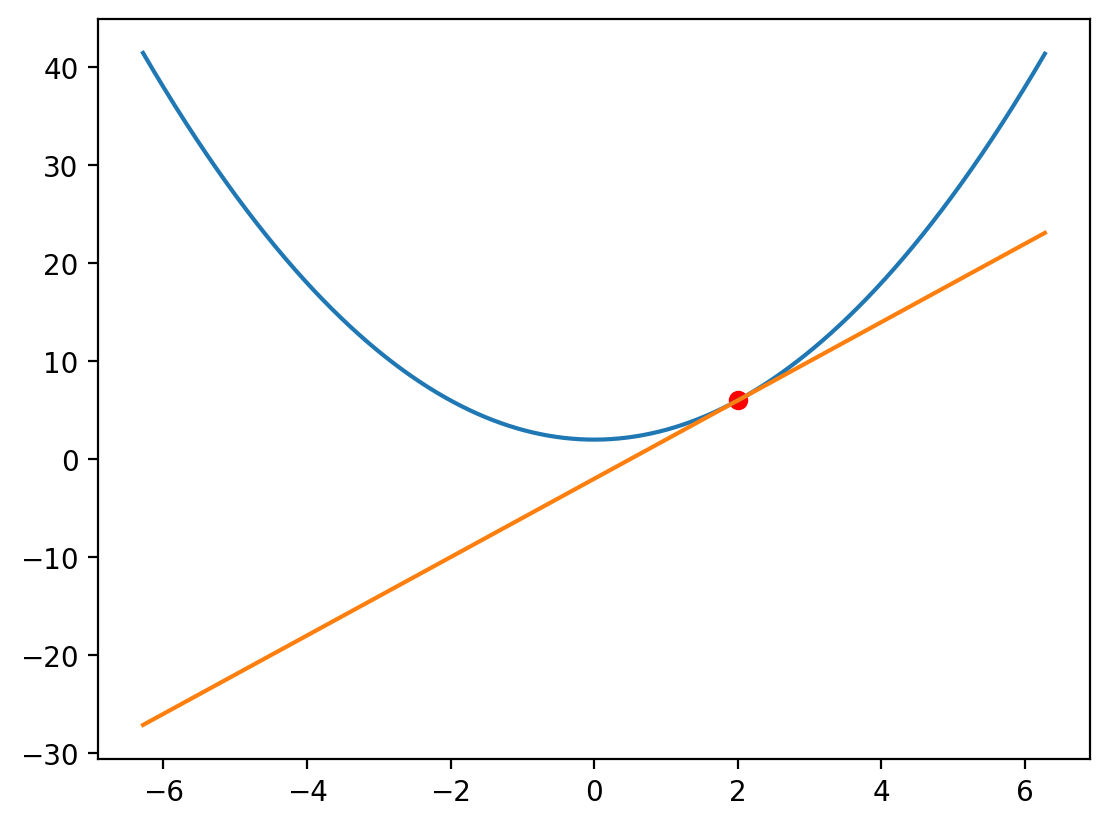

In [9]:
f = lambda x: x**2 + 2
plt.plot(x_range, f(x_range))
x0 = 2.0
plt.scatter(x0, f(torch.tensor(x0)), c='r', label='x0')
plt.plot(x_range, nth_order_appx(f, 1, x0)(x_range), label=f"order 1")

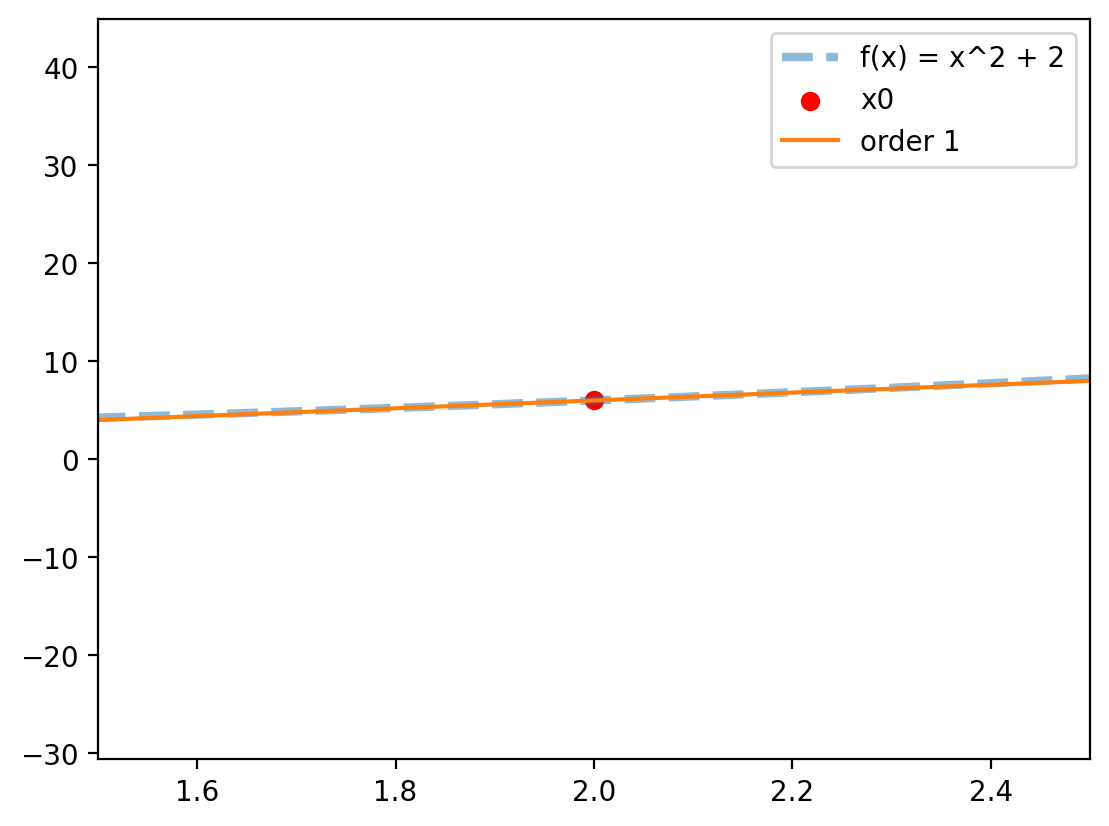

In [10]:
plt.plot(x_range, f(x_range), label="f(x) = x^2 + 2", lw=3, alpha=0.5, ls='--')
plt.scatter(x0, f(torch.tensor(x0)), c='r', label='x0')
plt.plot(x_range, nth_order_appx(f, 1, x0)(x_range), label=f"order 1")
plt.xlim(1.5, 2.5)
plt.legend()

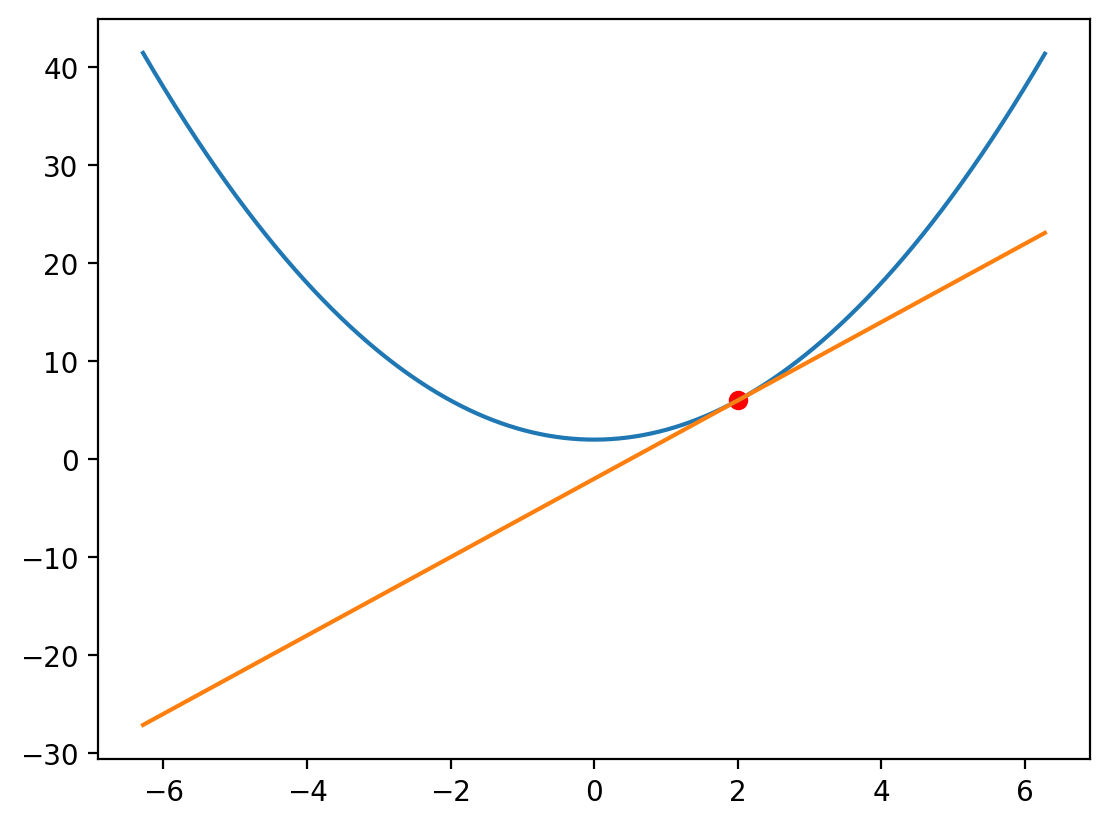

In [11]:
f = lambda x: x**2 + 2
plt.plot(x_range, f(x_range))
x0 = 2.0
plt.scatter(x0, f(torch.tensor(x0)), c='r', label='x0')
plt.plot(x_range, nth_order_appx(f, 1, x0)(x_range), label=f"order 1")

In [17]:
def plot_gd(alpha=0.1, iter=3):
    x0 = torch.tensor(2.0)

    xi = x0
    plt.plot(x_range, f(x_range), label="f(x) = x^2 + 2", lw=3, alpha=0.5, ls='--')
    for i in range(iter):
        plt.scatter(xi, f(xi), label=f'x{i} = {xi.item():0.2f}', s=100, c=f"C{i}")
        plt.plot(x_range, nth_order_appx(f, 1, xi)(x_range), label=f"order 1", c=f"C{i}")
        xi = xi - alpha * torch.func.grad(f)(xi)

    plt.xlim(-2.5, 2.5)
    plt.ylim(0, 8)
    plt.legend()


/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0)
/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0)
/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0)
/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor

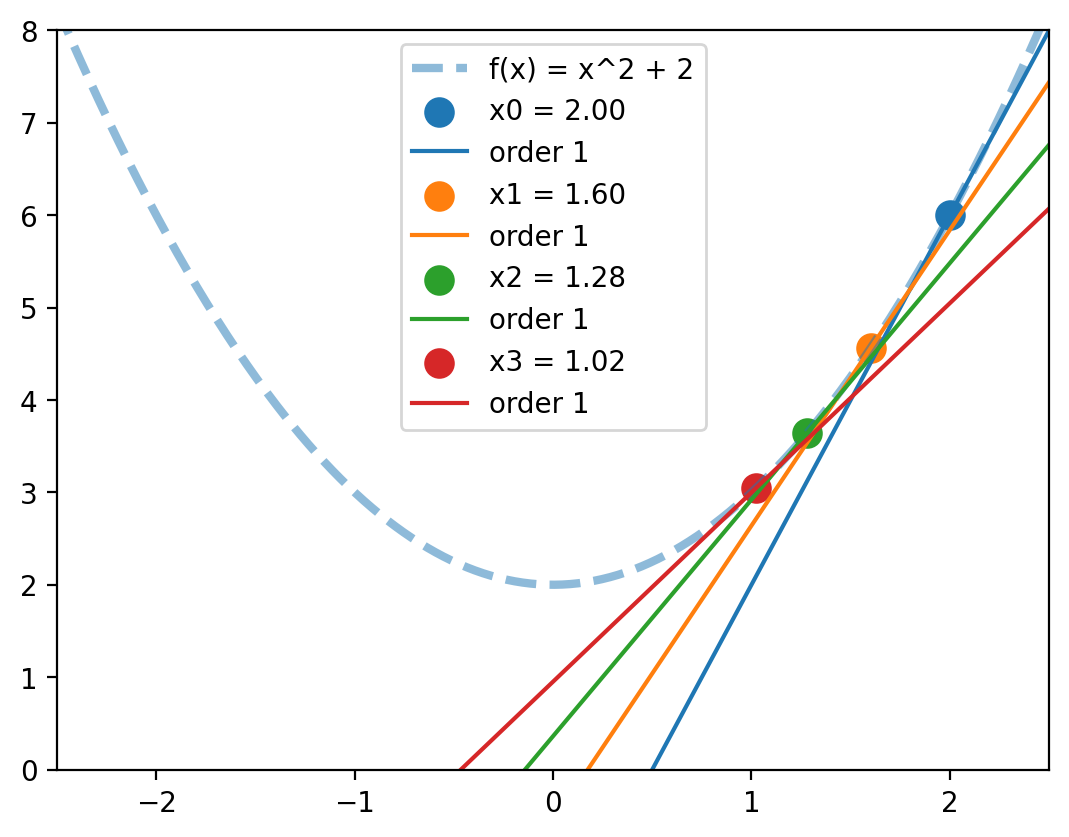

In [18]:
plot_gd(alpha=0.1, iter=4)

/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0)
/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0)
/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0)
/tmp/ipykernel_3425395/3273250015.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor

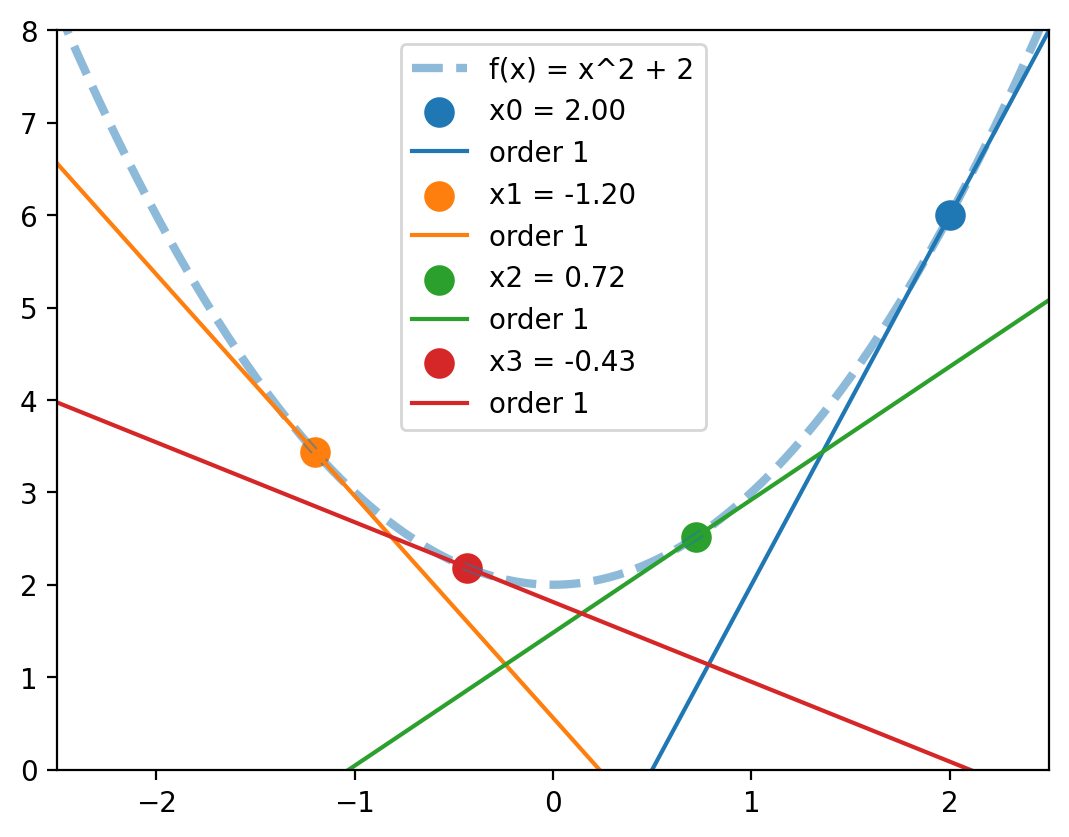

In [21]:
plot_gd(alpha=0.8, iter=4)